# <b><u> Project Title : NY Taxi Fares</u></b>

### Embarking on a Data Journey with Nare, Hakob, Roman, and Tigran

#### <u>Importing libraries</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
 

C:\Users\nareh\AppData\Local\Temp\ipykernel_31884\326655533.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### <u>Importing dataset</u>

In [2]:
df = pd.read_csv("merged_data.csv")
df

,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_minute
0,1,N,2013-01-27 08:52:14,2013-01-27 08:56:55,1,281,1.00,-73.995728,40.759247,-73.995743,...,0.0,0.5,1.20,0.0,7.20,2013-01-27,27,8,Sunday,52
1,1,NaN,2013-01-27 01:29:00,2013-01-27 01:43:00,1,840,3.36,-74.005180,40.721748,-73.986519,...,0.5,0.5,0.00,0.0,14.00,2013-01-27,27,1,Sunday,29
2,1,NaN,2013-01-24 10:23:00,2013-01-24 10:33:00,5,600,2.08,-73.978996,40.739059,-74.004250,...,0.0,0.5,0.00,0.0,9.50,2013-01-24,24,10,Thursday,23
3,1,NaN,2013-01-24 18:25:00,2013-01-24 18:39:00,1,840,1.66,-73.989639,40.753712,-73.987457,...,1.0,0.5,0.00,0.0,11.50,2013-01-24,24,18,Thursday,25
4,1,N,2013-01-27 03:24:31,2013-01-27 03:46:51,2,1340,8.40,-74.003632,40.741203,-73.979935,...,0.5,0.5,5.50,0.0,33.00,2013-01-27,27,3,Sunday,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92524,1,N,2013-01-15 11:59:16,2013-01-15 12:03:29,1,252,0.90,-73.985718,40.741138,-73.979248,...,0.0,0.5,0.00,0.0,6.00,2013-01-15,15,11,Tuesday,59
92525,1,NaN,2013-01-31 18:53:00,2013-01-31 19:01:00,1,480,1.93,-73.990044,40.752201,-74.003830,...,1.0,0.5,1.00,0.0,11.00,2013-01-31,31,18,Thursday,53
92526,1,NaN,2013-01-04 15:06:00,2013-01-04 15:18:00,1,720,1.75,-73.960663,40.762348,-73.981087,...,0.0,0.5,1.50,0.0,11.50,2013-01-04,4,15,Friday,6
92527,1,NaN,2013-01-16 13:56:00,2013-01-16 14:22:00,1,1560,10.19,-73.994698,40.750320,-73.924683,...,0.0,0.5,6.50,0.0,39.50,2013-01-16,16,13,Wednesday,56


### Feature details:
- id - a unique identifier for each trip
- rate_code - standardized categorization used in the taxi industry(1-6)
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- trip_time_in_secs - the number shows the duration of a taxi trip measured in seconds
- trip_distance - the measured distance traveled during a taxi trip
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- payment_type - shows the method used for payment in a taxi transaction
- fare_amount - signifies the base fare charged for a taxi trip before factoring in additional charges such as tolls, tips, or surcharges
- surcharge - an additional fee applied to the base fare of a taxi trip (such as peak hours, tolls, or other extra costs)
- mta_tax - a fixed fee imposed on taxi fares in New York City to support public transportation infrastructure
- tip_amount -  the gratuity or additional amount given voluntarily by the passenger to the taxi driver
- tolls_amount -  represents the cumulative cost of tolls incurred during a taxi trip
- total_amount - the comprehensive sum paid by a passenger for a taxi trip

#### <u>To enhance our analysis of taxi data, we are breaking down the `pickup_datetime` into key temporal components – day, week, and hour. This segmentation allows for a more detailed exploration of patterns and trends within the dataset.</u>

In [3]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [4]:
import calendar
df['pickup_date'] = df["pickup_datetime"].dt.date
df["pickup_day"] = df["pickup_datetime"].apply(lambda x:x.day)
df["pickup_hour"] = df["pickup_datetime"].apply(lambda x:x.hour)
df["pickup_minute"] = df["pickup_datetime"].apply(lambda x: x.minute)
df["pickup_day_of_week"] = df["pickup_datetime"].apply(lambda x:calendar.day_name[x.weekday()])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92529 entries, 0 to 92528
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rate_code           92529 non-null  int64         
 1   store_and_fwd_flag  46822 non-null  object        
 2   pickup_datetime     92529 non-null  datetime64[ns]
 3   dropoff_datetime    92529 non-null  object        
 4   passenger_count     92529 non-null  int64         
 5   trip_time_in_secs   92529 non-null  int64         
 6   trip_distance       92529 non-null  float64       
 7   pickup_longitude    92529 non-null  float64       
 8   pickup_latitude     92529 non-null  float64       
 9   dropoff_longitude   92529 non-null  float64       
 10  dropoff_latitude    92529 non-null  float64       
 11  payment_type        92529 non-null  object        
 12  fare_amount         92529 non-null  float64       
 13  surcharge           92529 non-null  float64   

In [6]:
df['pickup_longitude'].min()

-76.416664

In [7]:
df['pickup_longitude'].max()

-73.422081

In [8]:
df['pickup_latitude'].min()

40.094391

In [9]:
df['pickup_latitude'].max()

41.252991

In [10]:
df = df[((df['pickup_longitude'] > -78) &
        (df['pickup_longitude'] < -70)) &
        ((df['dropoff_longitude'] > -78) &
        (df['dropoff_longitude'] < -70)) &
        ((df['pickup_latitude'] > 37) &
        (df['pickup_latitude'] < 45)) &
        ((df['dropoff_latitude'] > 37) &
        (df['dropoff_latitude'] < 45)) &
        (df['passenger_count'] > 0) &
        (df['trip_distance'] > 0) &
        (df['fare_amount'] >= 2.5) &
        (df['pickup_minute'] > 0) &
        (df['pickup_hour'] > 0) &
        (df['pickup_minute'] > 0) &
        (df['trip_time_in_secs'] > 0) &
        (df['trip_time_in_secs'] > 0) &
        (df['rate_code'] > 0)]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92529 entries, 0 to 92528
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rate_code           92529 non-null  int64         
 1   store_and_fwd_flag  46822 non-null  object        
 2   pickup_datetime     92529 non-null  datetime64[ns]
 3   dropoff_datetime    92529 non-null  object        
 4   passenger_count     92529 non-null  int64         
 5   trip_time_in_secs   92529 non-null  int64         
 6   trip_distance       92529 non-null  float64       
 7   pickup_longitude    92529 non-null  float64       
 8   pickup_latitude     92529 non-null  float64       
 9   dropoff_longitude   92529 non-null  float64       
 10  dropoff_latitude    92529 non-null  float64       
 11  payment_type        92529 non-null  object        
 12  fare_amount         92529 non-null  float64       
 13  surcharge           92529 non-null  float64   

In [12]:
df.describe()

,rate_code,pickup_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,pickup_hour,pickup_minute
count,92529.000000,92529,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000
mean,1.026738,2013-01-17 00:43:08.614488320,1.691783,682.631845,2.739366,-73.975648,40.751586,-73.975178,40.751977,11.483512,0.313999,0.498930,1.248233,0.194581,13.739255,16.422095,14.081747,30.172508
min,1.000000,2013-01-01 01:01:00,1.000000,1.000000,0.010000,-76.416664,40.094391,-76.083328,40.094524,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000
25%,1.000000,2013-01-09 15:02:00,1.000000,360.000000,1.000000,-73.992035,40.737640,-73.991325,40.736919,6.500000,0.000000,0.500000,0.000000,0.000000,7.700000,9.000000,10.000000,15.000000
50%,1.000000,2013-01-17 07:36:01,1.000000,557.000000,1.700000,-73.981926,40.754471,-73.980492,40.754772,8.500000,0.000000,0.500000,0.800000,0.000000,10.500000,17.000000,15.000000,30.000000
75%,1.000000,2013-01-24 18:15:00,2.000000,876.000000,3.000000,-73.968109,40.768120,-73.965858,40.768623,13.000000,0.500000,0.500000,2.000000,0.000000,15.000000,24.000000,19.000000,45.000000
max,6.000000,2013-01-31 23:59:55,6.000000,7242.000000,73.600000,-73.422081,41.252991,-70.433334,41.383331,332.000000,1.000000,0.500000,182.450000,20.000000,338.300000,31.000000,23.000000,59.000000
std,0.228896,NaN,1.357762,486.713686,3.255985,0.034854,0.026692,0.035865,0.030195,9.291176,0.373481,0.023105,2.083130,1.014213,11.087540,8.850194,5.921601,17.028990


In [13]:
df.isnull().sum()

rate_code                 0
store_and_fwd_flag    45707
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_time_in_secs         0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
payment_type              0
fare_amount               0
surcharge                 0
mta_tax                   0
tip_amount                0
tolls_amount              0
total_amount              0
pickup_date               0
pickup_day                0
pickup_hour               0
pickup_day_of_week        0
pickup_minute             0
dtype: int64

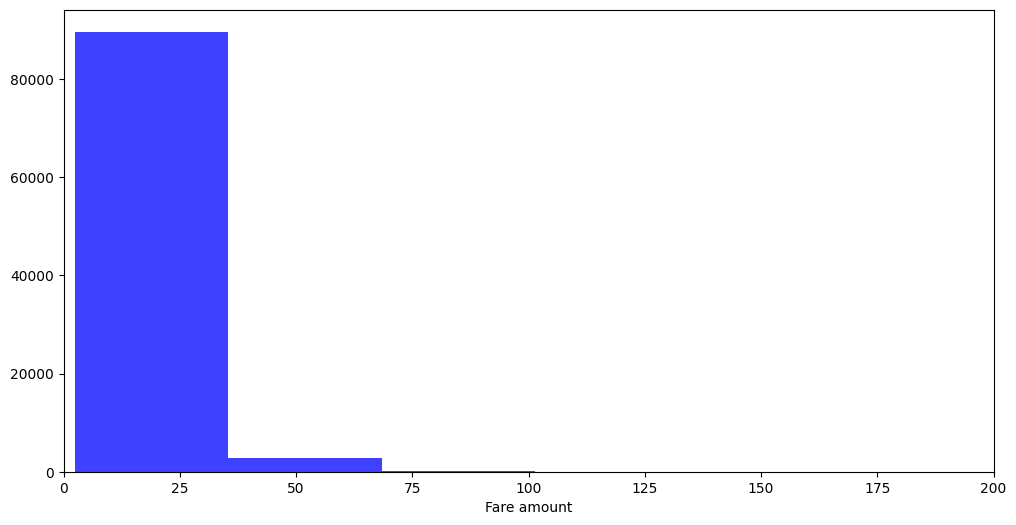

In [14]:
plt.figure(figsize = (12, 6))
plt.xlabel("Fare amount")
n, bins, patches = plt.hist(df.fare_amount, facecolor = "Blue", alpha = 0.75)
plt.xlim(0, 200)
plt.show()

In [15]:
df["fare_amount"].mean()

11.483512412324783

In [16]:
df["fare_amount"].max()

332.0

<Axes: ylabel='Density'>

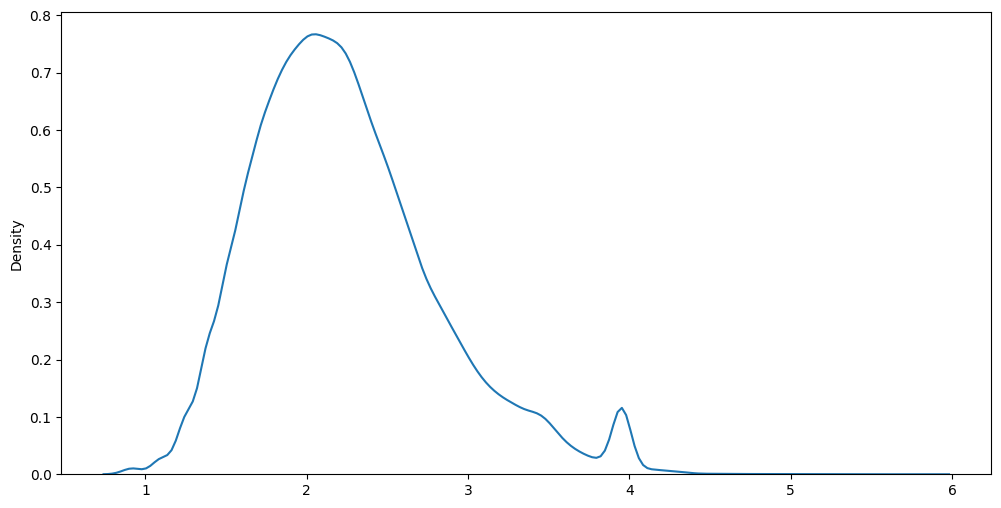

In [17]:
plt.figure(figsize = (12, 6))
sns.kdeplot(np.log(df["fare_amount"].values))

In [18]:
df['passenger_count'].value_counts()

passenger_count
1    65686
2    12506
5     5725
3     3700
6     3234
4     1678
Name: count, dtype: int64

Text(0, 0.5, 'Count')

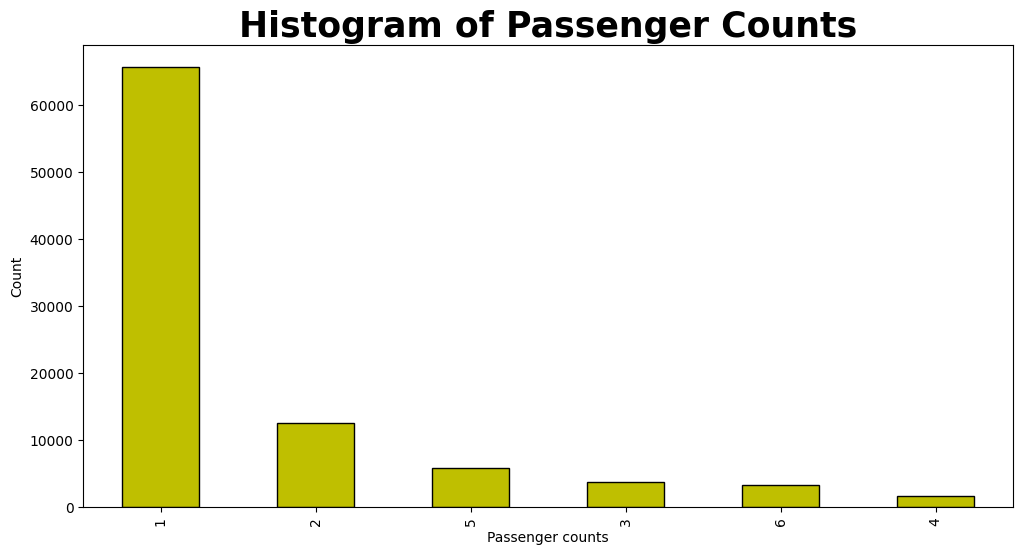

In [19]:
plt.figure(figsize = (12, 6))
df['passenger_count'].value_counts().plot.bar(color = "y", edgecolor = "k")
plt.title("Histogram of Passenger Counts",fontsize = 25, fontweight = 'bold')
plt.xlabel("Passenger counts")
plt.ylabel("Count")

C:\Users\nareh\AppData\Local\Temp\ipykernel_31884\884648512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_day_of_week',data=df,ax=ax,palette=palette)
C:\Users\nareh\AppData\Local\Temp\ipykernel_31884\884648512.py:3: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(x='pickup_day_of_week',data=df,ax=ax,palette=palette)


Text(0.5, 1.0, 'Number of Pickups done on each day of the week')

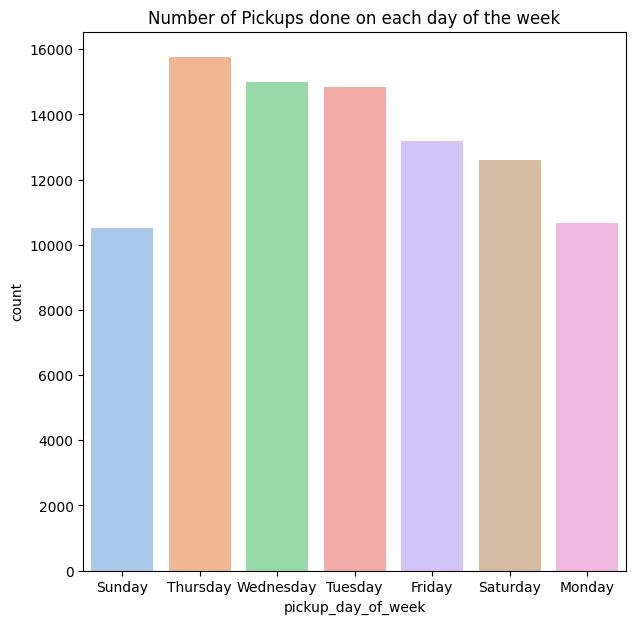

In [36]:
figure,ax=plt.subplots(nrows=1,ncols=1,figsize=(7,7))
palette = sns.color_palette("pastel")
sns.countplot(x='pickup_day_of_week',data=df,ax=ax,palette=palette)
ax.set_title('Number of Pickups done on each day of the week')



Text(0.5, 1.0, 'Total Picups in hours')

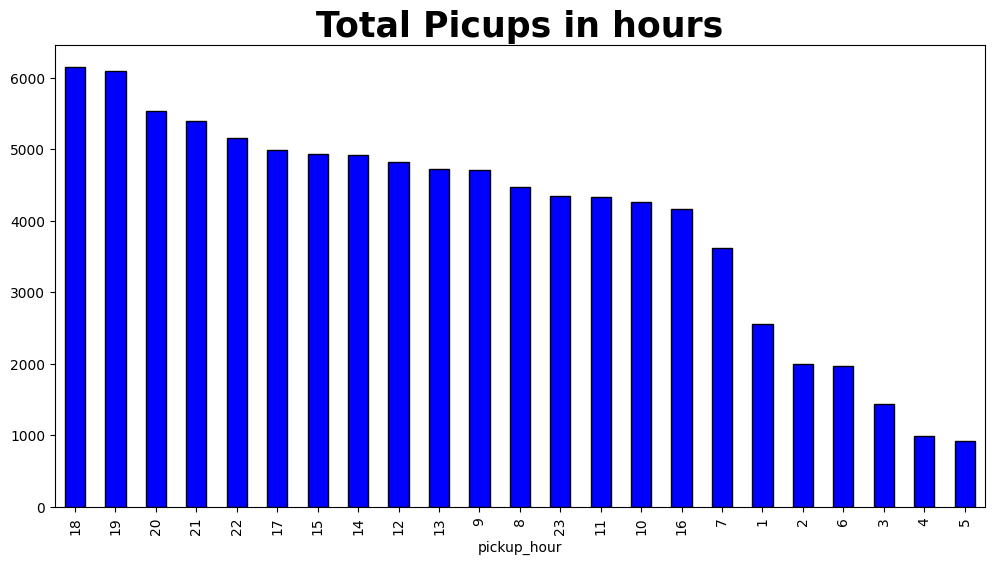

In [21]:
plt.figure(figsize = (12, 6))
df["pickup_hour"].value_counts().plot.bar(color = "b", edgecolor = "k")
plt.title("Total Picups in hours", fontsize = 25, fontweight = 'bold')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92529 entries, 0 to 92528
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rate_code           92529 non-null  int64         
 1   store_and_fwd_flag  46822 non-null  object        
 2   pickup_datetime     92529 non-null  datetime64[ns]
 3   dropoff_datetime    92529 non-null  object        
 4   passenger_count     92529 non-null  int64         
 5   trip_time_in_secs   92529 non-null  int64         
 6   trip_distance       92529 non-null  float64       
 7   pickup_longitude    92529 non-null  float64       
 8   pickup_latitude     92529 non-null  float64       
 9   dropoff_longitude   92529 non-null  float64       
 10  dropoff_latitude    92529 non-null  float64       
 11  payment_type        92529 non-null  object        
 12  fare_amount         92529 non-null  float64       
 13  surcharge           92529 non-null  float64   

(-74.03, -73.75)

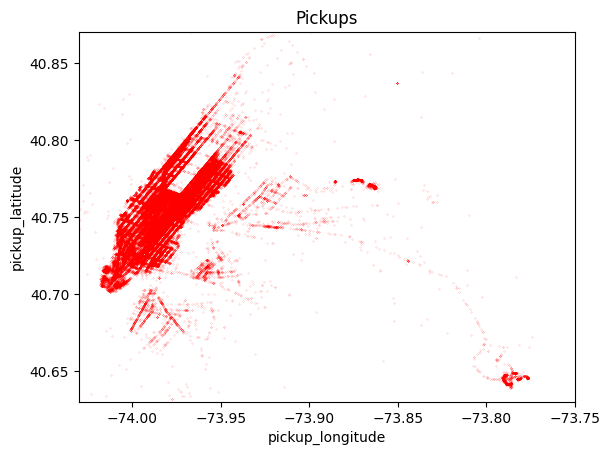

In [23]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.87)

df.plot(kind = "scatter", x = 'pickup_longitude', y = 'pickup_latitude', color = "red", s = .02, alpha = .6 )
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

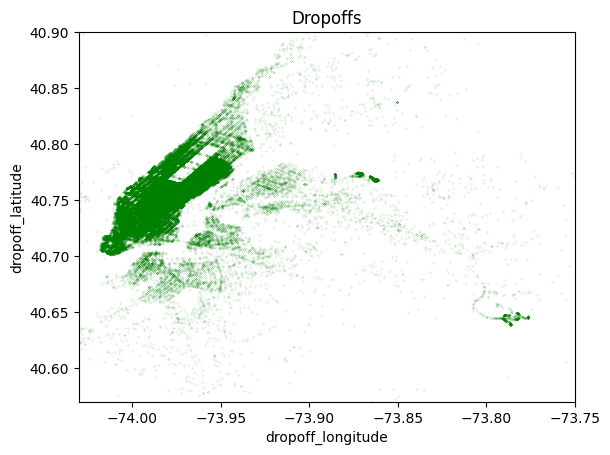

In [24]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.57, 40.9)

df.plot(kind = "scatter", x = 'dropoff_longitude', y = 'dropoff_latitude', color = "green", s = 0.02, alpha = 0.6 )
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [25]:
df["trip_distance"].min()

0.01

In [26]:
df["trip_distance"].max()

73.6

In [27]:
df["trip_distance"].mean()

2.7393659285197067

Text(0.5, 1.0, 'Distance')

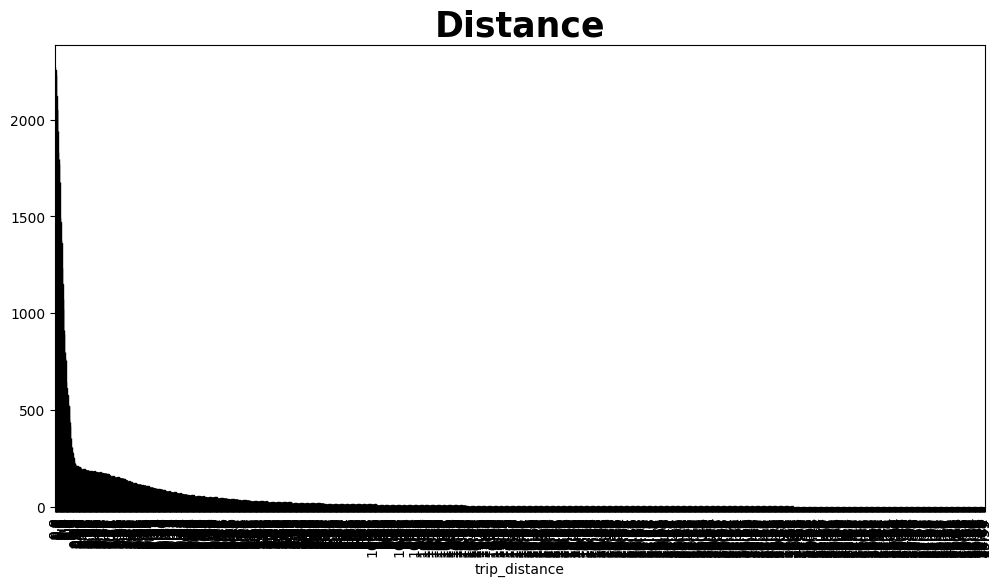

In [28]:
plt.figure(figsize = (12, 6))
df["trip_distance"].value_counts().plot.bar(color = "b", edgecolor = "k")
plt.title("Distance", fontsize = 25, fontweight = 'bold')

(-3.0, 10.0)

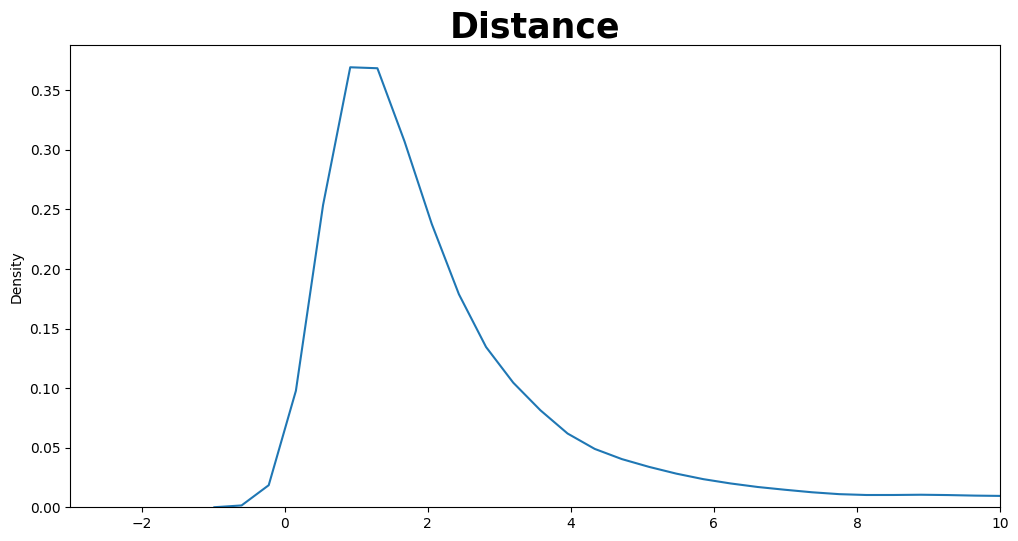

In [29]:
plt.figure(figsize = (12, 6))
sns.kdeplot(df['trip_distance'].values).set_title("Distance", fontsize = 25, fontweight = 'bold')
plt.xlim(-3, 10)

In [30]:
import folium

pickup_locations = folium.Map(location=[40.76, -73.98], tiles="OpenStreetMap", zoom_start=10)

for index, row in df[:700].iterrows():  # Iterate over each row using iterrows()
    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=3,
                        color='red',
                        popup=str(row['pickup_latitude']) + ',' + str(row['pickup_longitude']),
                        fill_color="yellow").add_to(pickup_locations)
    
pickup_locations

In [31]:
dropoff_locations = folium.Map(location=[40.76, -73.98], tiles="OpenStreetMap", zoom_start=10)

for index, row in df[:700].iterrows():  # Iterate over each row using iterrows()
    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=3,
                        color='green',
                        popup=str(row['dropoff_latitude']) + ',' + str(row['dropoff_longitude']),
                        fill_color="yellow").add_to(dropoff_locations)
    
dropoff_locations

In [32]:
df.to_csv('merged_data.csv', index=False)

In [33]:
df = pd.read_csv("merged_data.csv")
df


,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_minute
0,1,N,2013-01-27 08:52:14,2013-01-27 08:56:55,1,281,1.00,-73.995728,40.759247,-73.995743,...,0.0,0.5,1.20,0.0,7.20,2013-01-27,27,8,Sunday,52
1,1,NaN,2013-01-27 01:29:00,2013-01-27 01:43:00,1,840,3.36,-74.005180,40.721748,-73.986519,...,0.5,0.5,0.00,0.0,14.00,2013-01-27,27,1,Sunday,29
2,1,NaN,2013-01-24 10:23:00,2013-01-24 10:33:00,5,600,2.08,-73.978996,40.739059,-74.004250,...,0.0,0.5,0.00,0.0,9.50,2013-01-24,24,10,Thursday,23
3,1,NaN,2013-01-24 18:25:00,2013-01-24 18:39:00,1,840,1.66,-73.989639,40.753712,-73.987457,...,1.0,0.5,0.00,0.0,11.50,2013-01-24,24,18,Thursday,25
4,1,N,2013-01-27 03:24:31,2013-01-27 03:46:51,2,1340,8.40,-74.003632,40.741203,-73.979935,...,0.5,0.5,5.50,0.0,33.00,2013-01-27,27,3,Sunday,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92524,1,N,2013-01-15 11:59:16,2013-01-15 12:03:29,1,252,0.90,-73.985718,40.741138,-73.979248,...,0.0,0.5,0.00,0.0,6.00,2013-01-15,15,11,Tuesday,59
92525,1,NaN,2013-01-31 18:53:00,2013-01-31 19:01:00,1,480,1.93,-73.990044,40.752201,-74.003830,...,1.0,0.5,1.00,0.0,11.00,2013-01-31,31,18,Thursday,53
92526,1,NaN,2013-01-04 15:06:00,2013-01-04 15:18:00,1,720,1.75,-73.960663,40.762348,-73.981087,...,0.0,0.5,1.50,0.0,11.50,2013-01-04,4,15,Friday,6
92527,1,NaN,2013-01-16 13:56:00,2013-01-16 14:22:00,1,1560,10.19,-73.994698,40.750320,-73.924683,...,0.0,0.5,6.50,0.0,39.50,2013-01-16,16,13,Wednesday,56
